## Probabilidade e Inferência - Roteiro para analisar dados - Aplicação prática - Avaliação da unidade 2

**Integrantes do grupo: Gustavo de Freitas Rodrigues, Giovanna Camila Batista Silva Sousa e Mariana Emerenciano Miranda.**

*1*.   **Introdução**
* a. Contextualização do problema ou objetivo da análise de dados.
* b. Descrição dos dados disponíveis e fonte dos dados.

2.  **Pré-Processamento e tratamento de dados**

2.  **Análise Descritiva**
* a. Resumo estatístico dos dados: média, mediana, desvio padrão, mínimo, máximo, quartis, etc.
* b. Visualização dos dados: histogramas, gráficos de dispersão, box plots, etc.
* c. Identificação de valores ausentes ou discrepantes (outliers) nos dados.
* d. Análise de tendências e padrões nos dados.

4. **Amostragem**
* a. Definição da população de interesse.
* b. Métodos de amostragem utilizados (aleatória simples, estratificada, por conglomerados, etc.).

5.  **Modelagem**
* a. Seleção de um modelo estatístico apropriado para a análise dos dados (regressão linear, regressão logística, árvores de decisão, etc.).
* b. Ajuste do modelo aos dados e interpretação dos coeficientes.
* c. Avaliação da qualidade do ajuste do modelo (R-quadrado, deviance, etc.).
* d. Realização de previsões ou inferências com base no modelo.

6.  **Conclusão**
* a. Resumo dos principais resultados obtidos.


###*1*-Introdução - Sobre a base de dados

Este conjunto de dados contém informações abrangentes sobre diversos Pokémons, criaturas fictícias populares na franquia de jogos de Pokémon. Ele é feito por fãs e coletado do seguinte site: http://serebii.net/

O conjunto de dados é composto por várias colunas informativas que descrevem as características de um Pokémon, incluindo atributos como o nome, número na Pokédex, tipo (fogo, água, elétrico, etc.), habilidades, estatísticas de combate, fraquezas e evoluções.

O conjunto The Complete Pokemon Dataset está disponível em:
https://www.kaggle.com/datasets/rounakbanik/pokemon

Aqui estão listadas algumas informações sobre as 41 variáveis do conjunto de dados The Complete Pokemon Dataset:

* Atributos: Os atributos do conjunto de dados The Complete Pokemon Dataset incluem:
  * name: nome em inglês do Pokemon;
  * japanese_name: nome original, em japonês, do Pokemon;
  * pokedex_number: o número do Pokemon registrado na Pokedex;
  * percentage_male: a porcentagem de indivíduos masculinos sobre o total da população referente a esse Pokemon (valor nulo caso não haja gênero para essa espécie);
  * type1: o tipo primário do Pokemon;
  * type2: o tipo secundário do Pokemon;
  * classification: a classificação do Pokemon, de acordo com a Pokedex da Lua e do Sol;
  * height_m: altura do Pokemon, em metros;
  * weight_kg: peso do Pokemon, em quilogramas;
  * capture_rate: taxa de captura de um Pokemon;
  * base_egg_steps: número de passos necessários para chocar um ovo do Pokémon;
  * abilities: lista de habilidades que o Pokemon é capaz de ter, convertida em string;
  * experience_growth: crescimento da experiência do Pokemon
  * base_happiness: felicidade base do Pokemon;
  * against_?: dezoito características que indicam a quantidade de dano recebido contra um ataque de um tipo específico;
  * hp: pontos de vida base do Pokemon;
  * attack: ataque base do Pokemon;
  * defense: defesa base do Pokemon;
  * sp_attack: ataque especial base do Pokemon;
  * sp_defense: defesa especial base do Pokemon;
  * speed: a velocidade do Pokemon;
  * generation: a geração numerada na qual o Pokemon foi apresentado pela primeira vez;
  * is_legendary: expressa se o Pokemon é lendário (1 se for lendário, 0 caso contrário).
* Dessa forma, é possível realizar estudos sobre o comportamento dos dados e a relação entre diferentes informações neles contidas. Neste trabalho, faremos diversas análises que partem dos dados acessados, as principais estão listadas abaixo:
  * Qual o tipo de Pokemon, seja ele primário ou secundário, mais comum? E o mais raro?
  * É possivel construir um classificador que determine se um Pokemon é lendário ou não?
  * Existe alguma correlação entre a altura de um Pokémon e sua velocidade?
  * Qual é o tipo mais comum de Pokemon dentre aqueles que são lendários?
  * O tipo de um Pokémon está diretamente associado ao seu status base?






###*2*-Pré processamento e tratamento de dados





In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
#https://www.kaggle.com/datasets/rounakbanik/pokemon

In [ ]:
pokemons = pd.read_csv("/content/pokemon.csv")

In [ ]:
# transfere a coluna 'name' para a variável first_column
first_column = pokemons.pop('name')
# Insere a coluna 'first_column' na primeira coluna para facilitar a visualização.
pokemons.insert(0, 'name', first_column)

# transfere a coluna 'generation' para a variável snd_column
snd_column = pokemons.pop('generation')
# insere a coluna 'snd_column' na segunda coluna para facilitar a visualização.
pokemons.insert(1, 'generation', snd_column)

# transfere a coluna 'type1' para a variável trd_column
trd_column = pokemons.pop('type1')
# insere a coluna 'trd_column' na terceira coluna para facilitar a visualização.
pokemons.insert(2, 'type1', trd_column)

# transfere a coluna 'type2' para a variável frt_column
frt_column = pokemons.pop('type2')
# insere a coluna 'first_column' na primeira coluna para facilitar a visualização.
pokemons.insert(3, 'type2', frt_column)

NameError: name 'pokemons' is not defined

In [ ]:
pokemons #imprimir o head e tail da tabela

In [ ]:
# olhando um pouco mais a fundo as variáveis e as colunas atribuídas como "non-null", bem como o tipo de cada coluna
pokemons.info()

Como demonstrado acima, temos algumas variáveis que são nulas. Dessa forma, tratemos esses valores.

In [ ]:
pokemons.isnull().any()


name                 False
generation           False
type1                False
type2                 True
abilities            False
against_bug          False
against_dark         False
against_dragon       False
against_electric     False
against_fairy        False
against_fight        False
against_fire         False
against_flying       False
against_ghost        False
against_grass        False
against_ground       False
against_ice          False
against_normal       False
against_poison       False
against_psychic      False
against_rock         False
against_steel        False
against_water        False
attack               False
base_egg_steps       False
base_happiness       False
base_total           False
capture_rate         False
classfication        False
defense              False
experience_growth    False
height_m              True
hp                   False
japanese_name        False
percentage_male       True
pokedex_number       False
sp_attack            False
s

In [ ]:
# por essa linha comando, verificamos que percentage_male, height_m, type2 e weight_kg possuem valores nulos. vamos olhar mais a fundo.

In [ ]:
# primeiro, vamos alocar essas colunas em uma variável, a fim de guardar os valores nulos.
column_NaN = pokemons.isnull().any()

# agora, usamos a função "sum" para contar quantas ocasiões de nulos existem no column_nan
pokemons.isnull().sum()[column_NaN]

NameError: name 'pokemons' is not defined

Como mencionado na descrição dos atributos do conjunto de dados, a variável 'percentage_male' há de ser nula devido à possibilidade de um Pokemon não ter gênero. Dessa forma, substituiremos as ocasiões de nulo por "N/A", ou seja, não aplicável.

De forma análoga os valores nulos do atributo 'type2' relatam as ocorrências de Pokemons que não apresentar tipo secundário. Dessa forma, agruparemos esses casos com "None".

In [ ]:
# substitui os valores faltantes em 'percentage_male' por 'N/A'
pokemons.percentage_male.fillna('N/A', inplace=True)
# substitui os valores faltantes em 'type2' por 'None'
pokemons.type2.fillna('None', inplace=True)

NameError: name 'pokemons' is not defined

Nos atributos de 'weight_kg' e 'height_m', verificamos a presença de apenas 20 valores faltantes. Assim, podemos preenchê-los manualmente. Verifiquemos quais Pokemons apresentam essa deficiência nos dados:





In [ ]:
# reunindo os pokemons cujos valores para peso são faltantes
missing_val = pokemons[['name','height_m','weight_kg']].loc[pokemons.weight_kg.isnull()]

# mostrar a tabela
missing_val

,name,height_m,weight_kg
18,Rattata,NaN,NaN
19,Raticate,NaN,NaN
25,Raichu,NaN,NaN
26,Sandshrew,NaN,NaN
27,Sandslash,NaN,NaN
36,Vulpix,NaN,NaN
37,Ninetales,NaN,NaN
49,Diglett,NaN,NaN
50,Dugtrio,NaN,NaN
51,Meowth,NaN,NaN


Por coincidência, constatamos que os valores ausentes para a variável "height_m" ocorrem nas mesmas linhas em que aqueles verificados para a variável "weight_kg".

Agora, preencheremos as informações das colunas faltantes com dados retirados do site https://serebii.net

In [ ]:
# preenchendo os valores faltantes do dataset com informações obtidas da fonte:

pokemons.at[18,'height_m'] = 0.3
pokemons.at[18,'weight_kg'] = 3.8
# fonte: https://serebii.net

pokemons.at[19,'height_m'] = 0.7
pokemons.at[19,'weight_kg'] = 25.5
# fonte: https://serebii.net

pokemons.at[25,'height_m'] = 0.7
pokemons.at[25,'weight_kg'] = 21.0
# fonte: https://serebii.net

pokemons.at[26,'height_m'] = 0.7
pokemons.at[26,'weight_kg'] = 40.0
# fonte: https://serebii.net

pokemons.at[27,'height_m'] = 1.2
pokemons.at[27,'weight_kg'] = 55.0
# fonte: https://serebii.net

pokemons.at[36,'height_m'] = 0.6
pokemons.at[36,'weight_kg'] = 9.9
# fonte: https://serebii.net

pokemons.at[37,'height_m'] = 1.1
pokemons.at[37,'weight_kg'] = 19.9
# fonte: https://serebii.net

pokemons.at[49,'height_m'] = 0.2
pokemons.at[49,'weight_kg'] = 1.0
# fonte: https://serebii.net

pokemons.at[50,'height_m'] = 0.7
pokemons.at[50,'weight_kg'] = 66.6
# fonte: https://serebii.net

pokemons.at[51,'height_m'] = 0.4
pokemons.at[51,'weight_kg'] = 4.2
# fonte: https://serebii.net

pokemons.at[52,'height_m'] = 1.1
pokemons.at[52,'weight_kg'] = 33.0
# fonte: https://serebii.net

pokemons.at[73,'height_m'] = 0.4
pokemons.at[73,'weight_kg'] = 20.0
# fonte: https://serebii.net

pokemons.at[74,'height_m'] = 1.0
pokemons.at[74,'weight_kg'] = 105.0
# fonte: https://serebii.net

pokemons.at[75,'height_m'] = 1.4
pokemons.at[75,'weight_kg'] = 300.0
# fonte: https://serebii.net

pokemons.at[89,'height_m'] = 0.9
pokemons.at[89,'weight_kg'] = 30.0
# fonte: https://serebii.net

pokemons.at[90,'height_m'] = 1.2
pokemons.at[90,'weight_kg'] = 30.0
# fonte: https://serebii.net

pokemons.at[102,'height_m'] = 2.0
pokemons.at[102,'weight_kg'] = 120.0
# fonte: https://serebii.net

pokemons.at[104,'height_m'] = 1.0
pokemons.at[104,'weight_kg'] = 45.0
# fonte: https://serebii.net

pokemons.at[719,'height_m'] = 6.5
pokemons.at[719,'weight_kg'] = 490.0
# fonte: https://serebii.net

pokemons.at[744,'height_m'] = 1.1
pokemons.at[744,'weight_kg'] = 25.0
# fonte: https://serebii.net


In [ ]:
# resultado do tratamento de dados:
pokemons[['name','height_m','weight_kg']].loc[list(missing_val.index)]


,name,height_m,weight_kg
18,Rattata,0.3,3.8
19,Raticate,0.7,25.5
25,Raichu,0.7,21.0
26,Sandshrew,0.7,40.0
27,Sandslash,1.2,55.0
36,Vulpix,0.6,9.9
37,Ninetales,1.1,19.9
49,Diglett,0.2,1.0
50,Dugtrio,0.7,66.6
51,Meowth,0.4,4.2


In [ ]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   generation         801 non-null    int64  
 2   type1              801 non-null    object 
 3   type2              801 non-null    object 
 4   abilities          801 non-null    object 
 5   against_bug        801 non-null    float64
 6   against_dark       801 non-null    float64
 7   against_dragon     801 non-null    float64
 8   against_electric   801 non-null    float64
 9   against_fairy      801 non-null    float64
 10  against_fight      801 non-null    float64
 11  against_fire       801 non-null    float64
 12  against_flying     801 non-null    float64
 13  against_ghost      801 non-null    float64
 14  against_grass      801 non-null    float64
 15  against_ground     801 non-null    float64
 16  against_ice        801 non

Dessa forma, todas as colunas do conjunto de dados estão devidamente preenchidas, de modo que todos os valores nulos foram tratados.

Ao todo, existem 41 atributos na base de dados. Contudo, não utilizaremos todos eles em uma única análise, de modo que faremos uma subdivisão da tabela maior em uma tabela menor. Ela conterá apenas determinadas variáveis mais específicas, ou seja, estaremos selecionando as variáveis de interesse.




Para a primeira análise, faremos uma tabela que conterá atributos primários dos Pokemons.

In [ ]:
# selecionando os status base
pokemon_base_stats = pokemons[
    ['hp','attack','defense','sp_attack','sp_defense','speed']
]


###*3*- Análise descritiva

In [ ]:
# importando bibliotecas necessárias.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [ ]:
# exibir as primeiras amostras de Pokemons
print("Pokemons:")
pokemons.head()

Pokemons:


,name,generation,type1,type2,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,...,height_m,hp,japanese_name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,Bulbasaur,1,grass,poison,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,...,0.7,45,Fushigidaneフシギダネ,88.1,1,65,65,45,6.9,0
1,Ivysaur,1,grass,poison,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,...,1.0,60,Fushigisouフシギソウ,88.1,2,80,80,60,13.0,0
2,Venusaur,1,grass,poison,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,...,2.0,80,Fushigibanaフシギバナ,88.1,3,122,120,80,100.0,0
3,Charmander,1,fire,None,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,...,0.6,39,Hitokageヒトカゲ,88.1,4,60,50,65,8.5,0
4,Charmeleon,1,fire,None,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,...,1.1,58,Lizardoリザード,88.1,5,80,65,80,19.0,0


In [ ]:
# exibindo um resumo estatístico dos Pokemons
print("\nResumo Estatístico dos Pokemons:")
pokemons.describe()


Resumo Estatístico dos Pokemons:


,generation,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,defense,experience_growth,height_m,hp,pokedex_number,sp_attack,sp_defense,speed,weight_kg,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,8.010000e+02,799.000000,801.000000,801.000000,801.000000,801.000000,801.000000,799.000000,801.000000
mean,3.690387,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,...,73.008739,1.054996e+06,1.164456,68.958801,401.000000,71.305868,70.911361,66.334582,61.632916,0.087391
std,1.930420,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,...,30.769159,1.602558e+05,1.086988,26.576015,231.373075,32.353826,27.942501,28.907662,109.620661,0.282583
min,1.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,...,5.000000,6.000000e+05,0.100000,1.000000,1.000000,10.000000,20.000000,5.000000,0.100000,0.000000
25%,2.000000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,...,50.000000,1.000000e+06,0.600000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,70.000000,1.000000e+06,1.000000,65.000000,401.000000,65.000000,66.000000,65.000000,28.000000,0.000000
75%,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,90.000000,1.059860e+06,1.500000,80.000000,601.000000,91.000000,90.000000,85.000000,63.900000,0.000000
max,7.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,230.000000,1.640000e+06,14.500000,255.000000,801.000000,194.000000,230.000000,180.000000,999.900000,1.000000


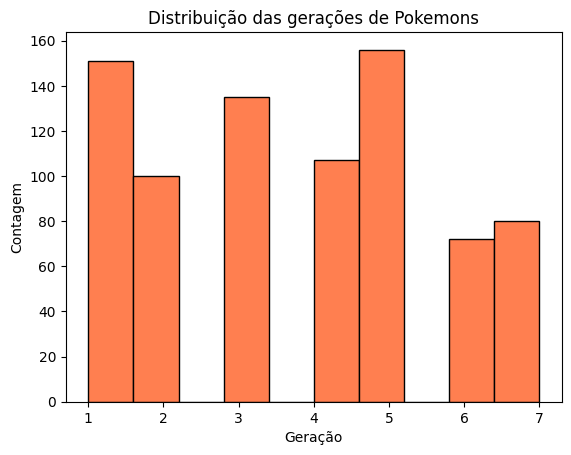

In [ ]:
# exibindo um gráfico que represente um histograma das gerações dos Pokemons
pokemons['generation'].plot(kind='hist', color = 'coral', edgecolor='black')
plt.xlabel('Geração')
plt.ylabel('Contagem')
plt.title('Distribuição das gerações de Pokemons')
plt.show()

Text(0.5, 1.0, 'Contagem de Pokemons de tipo único e duplo em todas as gerações')

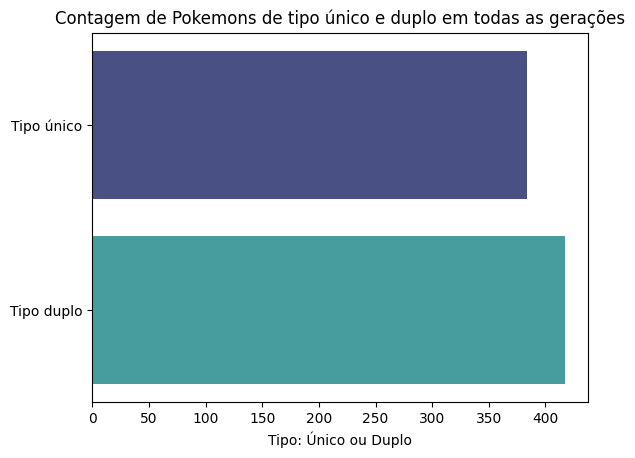

In [ ]:
# exibindo um gráfico que expresse o número total de pokemons com tipo único ou duplo

# número de Pokemons com um tipo único
single = pokemons['type2'].loc[pokemons.type2 == 'None'].count()
# número de Pokemons com tipo duplo (único+secundário)
dual = pokemons['type2'].loc[pokemons.type2 != 'None'].count()


type_s_or_d = pd.Series([single,dual],
                                       index=['Tipo único','Tipo duplo'],
                                       name='Tipo: Único ou Duplo')

sns.barplot(x=type_s_or_d,
            y=type_s_or_d.index, palette = 'mako')

plt.title("Contagem de Pokemons de tipo único e duplo em todas as gerações")


In [ ]:
# selecionando e exibindo os valores únicos em type1, ou seja, todos os tipos diferentes de pokemons

type1 = set(pokemons.type1.unique())
print(type1)
print("\n")
print('Total:',len(type1))

# de forma análoga, façamos em type2

type2 = set(pokemons.type2.unique())
type2.remove('None')
print(type2, '\n')
print('total:', len(type2))



{'bug', 'fairy', 'ice', 'psychic', 'ghost', 'dragon', 'steel', 'flying', 'grass', 'poison', 'normal', 'dark', 'fire', 'ground', 'rock', 'water', 'fighting', 'electric'}


Total: 18
{'grass', 'dark', 'dragon', 'ice', 'electric', 'fighting', 'bug', 'fairy', 'psychic', 'steel', 'flying', 'normal', 'fire', 'ground', 'poison', 'ghost', 'rock', 'water'} 

total: 18


Uma vez feita a contagem dos valores cada tipo, definiremos uma cor para cada um dos tipos. As cores vão ser coletadas e definidas pelo site https://serebii.net/, no qual estão indicadas cores-padrão para cada tipo de Pokemon.

In [ ]:
type_color_dict = {'grass':'#78C850',
                   'fire':'#F08030',
                   'water':'#6890F0',
                   'bug':'#A8B820',
                   'normal':'#A8A878',
                   'poison':'#A040A0',
                   'electric':'#F8D030',
                   'ground':'#E0C068',
                   'fairy':'#EE99AC',
                   'fighting':'#C03028',
                   'psychic':'#F85888',
                   'rock':'#B8A038',
                   'ghost':'#705898',
                   'ice':'#98D8D8',
                   'dragon':'#7038F8',
                   'dark':'#705848',
                   'steel':'#B8B8D0',
                   'flying':'#A890F0'
                  }

Text(0.5, 0, 'Contagem')

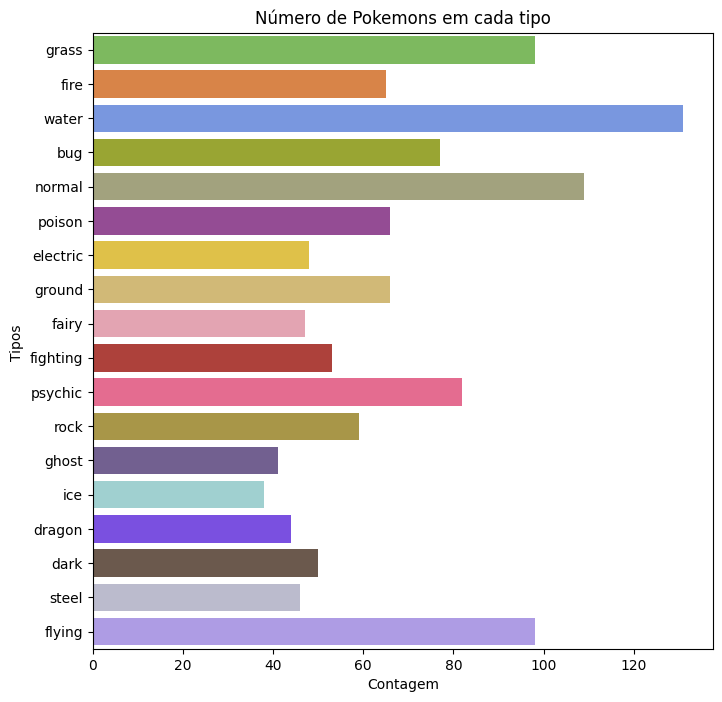

In [ ]:
# plotando um gráfico que demonstre quantos pokemons existem de cada tipo dentre as amostras do dataset:


# criando uma lista com todos os 18 tipos de pokemon
types = list(pokemons.type1.unique())

# contagem dos números de pokemon por cada tipo
tp1 = pokemons.groupby('type1').type1.count()
tp2 = pokemons.groupby('type2').type2.count()

count = []
for t in types:
    count.append(tp1[t]+tp2[t])

# criando uma série para representar os tipos de pokemons e a contagem de cada um
pokemon_types_count = pd.Series(count, index=types, name='type')

plt.figure(figsize=(8,8))

# plotando o gráfico
type_colors = []
for t in types:
    type_colors.append(type_color_dict[t])

sns.barplot(x=pokemon_types_count,
            y=pokemon_types_count.index,
            palette=type_colors)

plt.title('Número de Pokemons em cada tipo')
plt.ylabel("Tipos ")
plt.xlabel("Contagem")

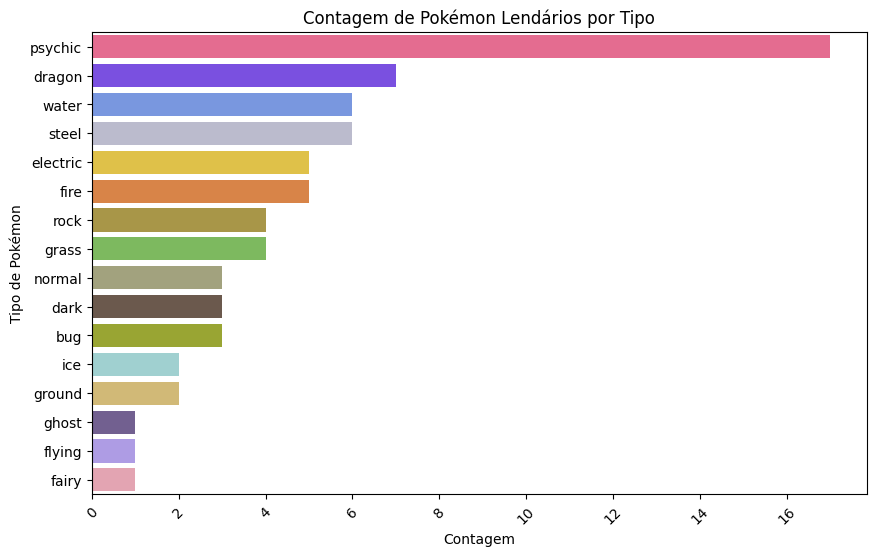

In [ ]:
# plotando um gráfico que exiba a distribuição de pokemons lendários de acordo com seus tipos:


legendary_pokemon = pokemons[pokemons['is_legendary'] == 1]
legendary_counts = legendary_pokemon['type1'].value_counts()


# definir os tipos de Pokémon lendários e suas respectivas contagens
types = legendary_counts.index
counts = legendary_counts.values

# plotando o gráfico
type_colors = []
for t in types:
    type_colors.append(type_color_dict[t])

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))

sns.barplot(x=counts,
            y=types,
            palette=type_colors)
plt.ylabel('Tipo de Pokémon')
plt.xlabel('Contagem')
plt.title('Contagem de Pokémon Lendários por Tipo')
plt.xticks(rotation=45)
plt.show()

Agora, utilizaremos a base de dados já filtrada, contendo as variáveis de interesse a partir do status base.



In [ ]:
# resumo estatístico dos Pokemons
print("\nResumo Estatístico dos status dos Pokemons:")
pokemon_base_stats.describe()


Resumo Estatístico dos status dos Pokemons:


,hp,attack,defense,sp_attack,sp_defense,speed
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582
std,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000
75%,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000
max,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000


Text(0, 0.5, 'Contagem')

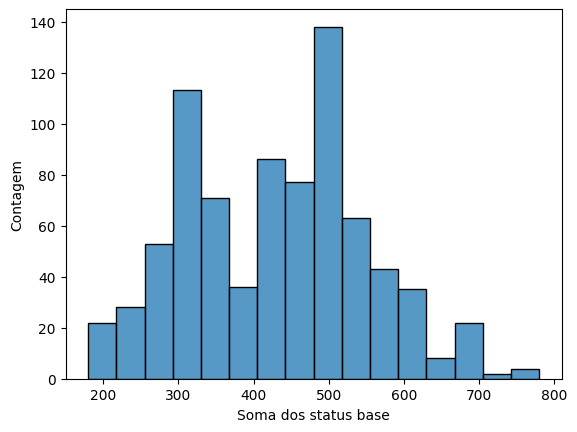

In [ ]:
# Calcula a soma dos valores de cada linha no DataFrame "pokemon_base_stats" ao longo do eixo 1 (ou seja, soma os status base de cada Pokémon)
status_total = pokemon_base_stats.sum(axis=1)

# Cria um histograma utilizando a biblioteca seaborn (sns) para visualizar a distribuição dos valores da variável "status_total"
sns.histplot(status_total)

# Define o rótulo do eixo x do gráfico como "Soma dos status base"
plt.xlabel('Soma dos status base')

# Define o rótulo do eixo y do gráfico como "Contagem"
plt.ylabel('Contagem')


In [ ]:
# do gráfico acima, quais são os lendários?

Text(0, 0.5, 'Contagem')

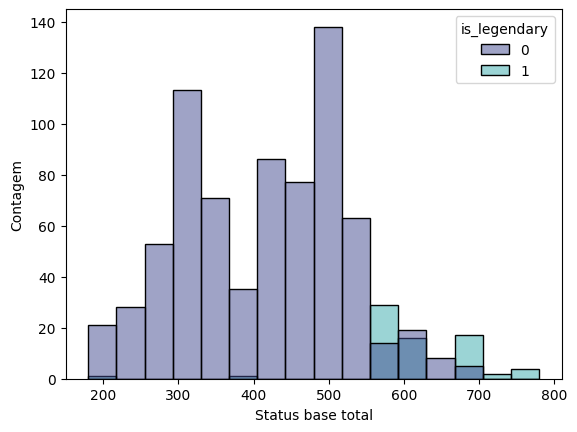

In [ ]:
# selecionando a coluna de lendários da tabela
legendary = pokemons['is_legendary']

# relacionando os pokemons lendarios com o status total
status_total_leg = pd.concat([status_total,legendary], axis=1)

# plotando o gráfico
sns.histplot(data=status_total_leg,
             x=status_total,
             hue='is_legendary', palette = 'mako')

plt.xlabel('Status base total')
plt.ylabel('Contagem')


In [ ]:
# e se separarmos por geração?

Text(0, 0.5, 'Contagem')

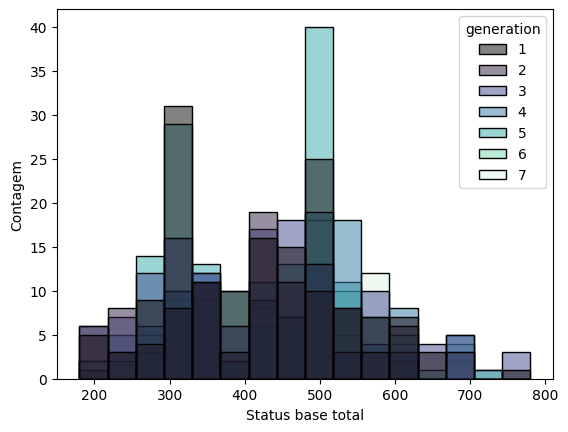

In [ ]:
# selecionando a coluna de geração
gen = pokemons['generation']

# concatenando a tabela de status total com a geração dos pokemons
status_total_gen = pd.concat([status_total,gen], axis=1)


# plotando o gráfico
sns.histplot(data=status_total_gen,
             x=status_total,
             hue='generation', palette = 'mako')

plt.xlabel('Status base total')
plt.ylabel('Contagem')


Text(0, 0.5, 'Status base total')

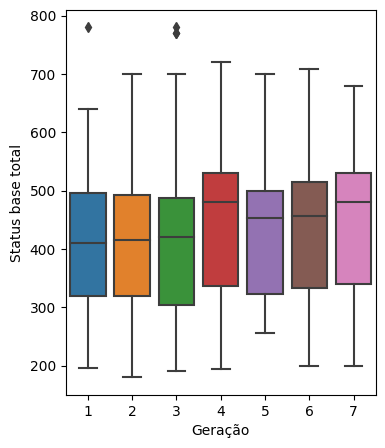

In [ ]:
# plotando mais um gráfico que relaciona o status base total com a geração dos pokemons

status_total_gen.rename(columns={0:'status_total'}, inplace=True)

plt.figure(figsize=(4,5))

sns.boxplot(data=status_total_gen, x='generation', y='status_total')

plt.xlabel('Geração')
plt.ylabel('Status base total')

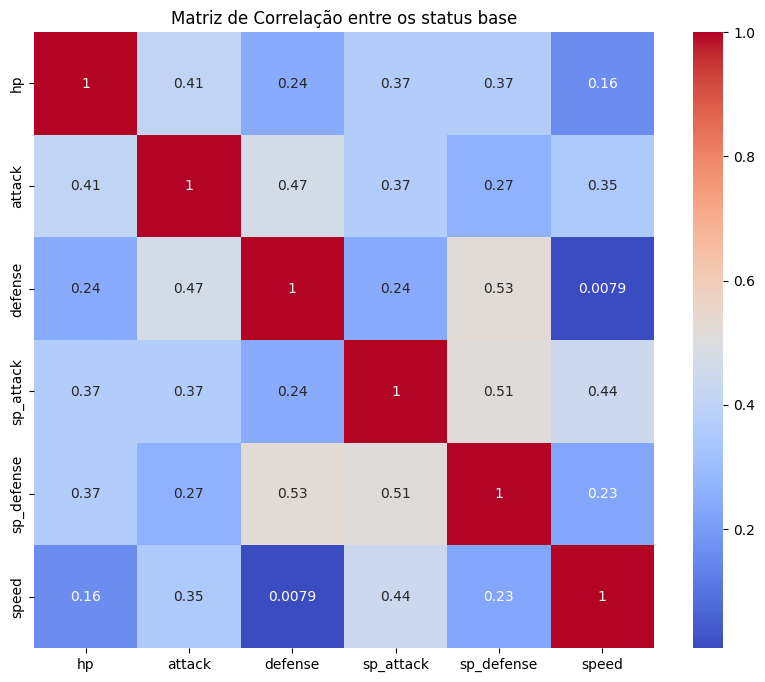

In [ ]:
# matriz de correlação
# Define o tamanho da figura do gráfico como 10 (largura) por 8 (altura) polegadas
plt.figure(figsize=(10, 8))

# Calcula a matriz de correlação para o DataFrame "pokemon_base_stats", onde as colunas são os status base dos Pokémon
correlation_matrix = pokemon_base_stats.corr()

# Cria um mapa de calor utilizando a biblioteca seaborn (sns) para visualizar a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Define o título do gráfico como "Matriz de Correlação entre os status base"
plt.title('Matriz de Correlação entre os status base')

# Exibe o gráfico do mapa de calor
plt.show()


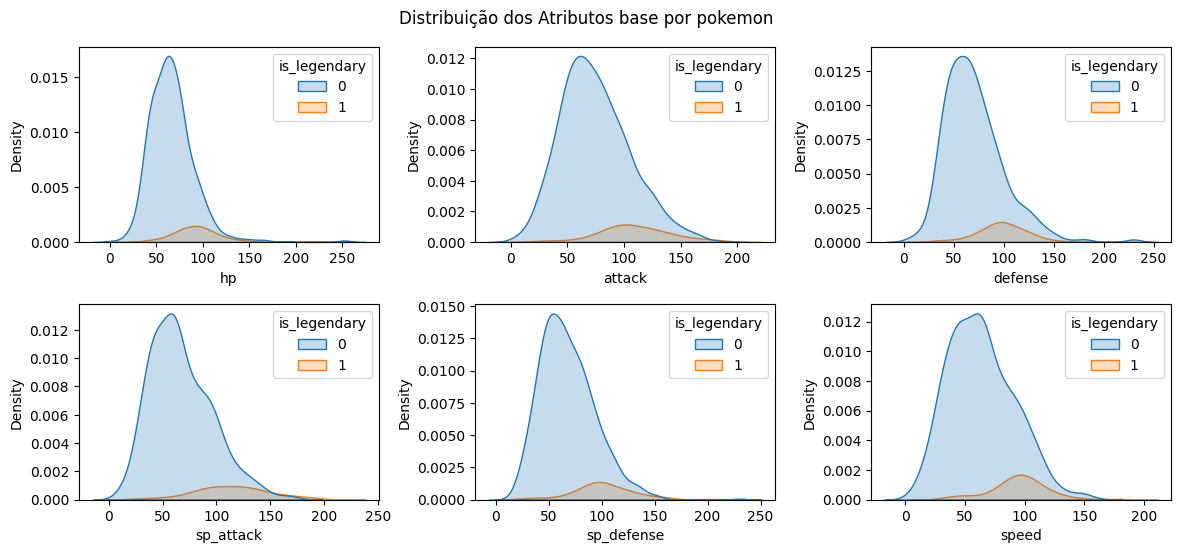

In [ ]:
# Define o tamanho da figura do gráfico como 12 (largura) por 10 (altura) polegadas
plt.figure(figsize=(12, 10))

# Lista dos atributos base que serão plotados
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Loop através dos atributos base selecionados para criar os gráficos de densidade
for feature in features:
    # Define o espaço de subplot para cada gráfico de densidade (4 linhas, 3 colunas)
    plt.subplot(4, 3, features.index(feature) + 1)

    # Cria um gráfico de densidade (kdeplot) utilizando a biblioteca seaborn (sns)
    # A diferenciação entre pokémons lendários e não lendários será representada pelas cores do preenchimento (hue='is_legendary')

    sns.kdeplot(data=pokemons, x=feature, hue='is_legendary', fill=True)

# Ajusta o layout dos subplots para evitar sobreposições
plt.tight_layout()

# Define o título geral do conjunto de gráficos como "Distribuição dos Atributos base por Pokemon"
plt.suptitle('Distribuição dos Atributos base por Pokemon', y=1.02)

# Exibe os gráficos
plt.show()


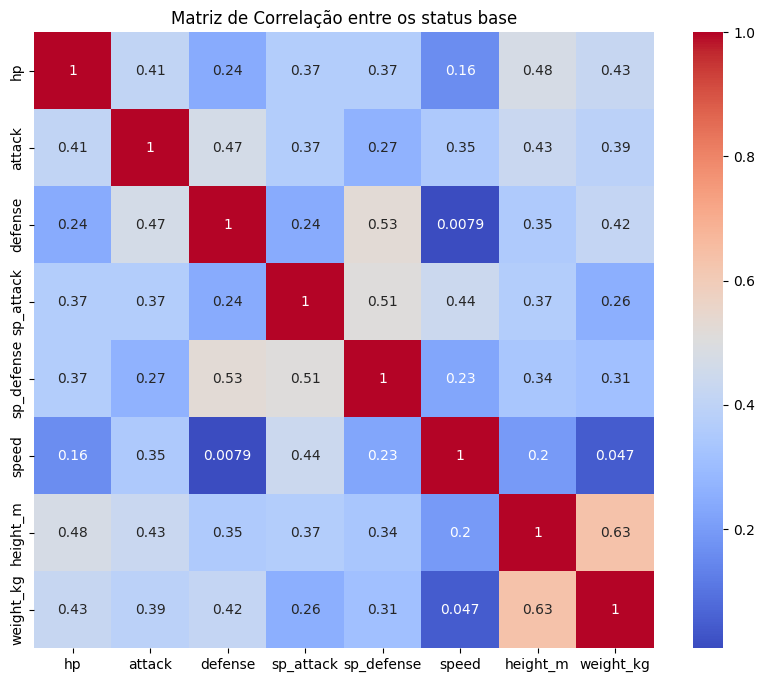

In [ ]:
# selecionando a coluna de altura, kilo, crescimento de experiência e taxa de captura
columns = pokemons[['height_m','weight_kg']]

# concatenando a tabela de status total com a geração
status_total = pd.concat([pokemon_base_stats,columns], axis=1)


# matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = status_total.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre os status base')
plt.show()

Text(0.5, 1.02, 'Distribuição dos Atributos base por pokemon')

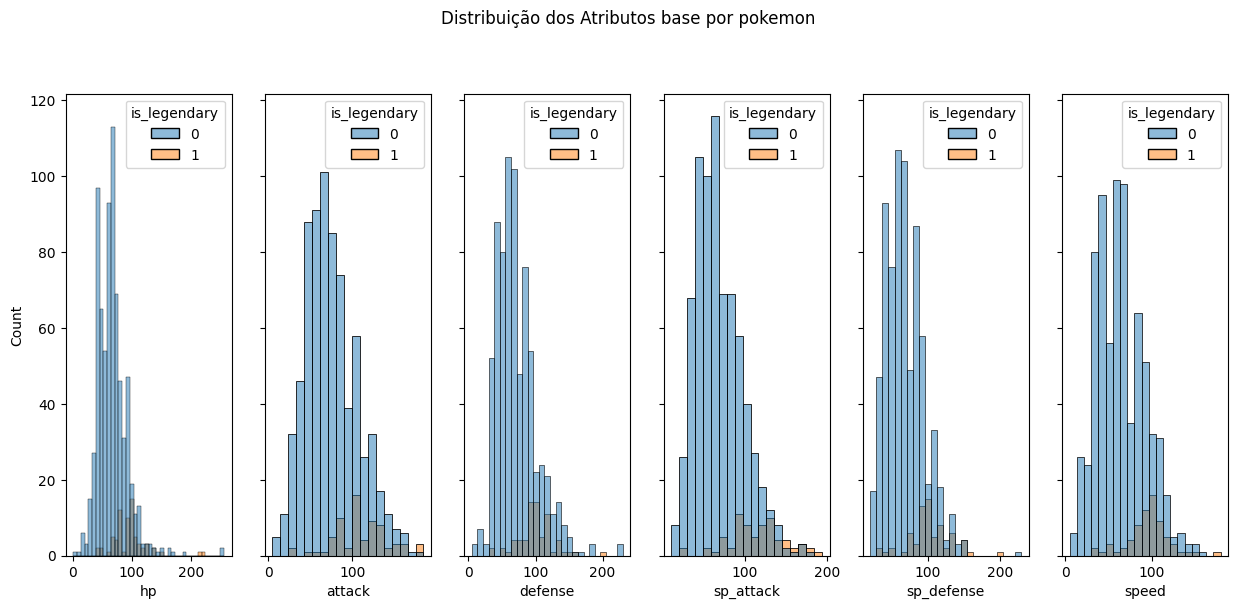

In [ ]:
# Cria uma figura e um array de eixos (subplots) com uma única linha (1) e seis colunas (6)
#"figsize=(15,6)" define o tamanho da figura como 15 (largura) por 6 (altura) polegadas
#"sharey=True" faz com que todos os gráficos compartilhem o mesmo eixo y
fig, ax = plt.subplots(1, 6, figsize=(15, 6), sharey=True)

# Lista dos atributos base que serão analisados
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Loop para criar os gráficos de histograma para cada atributo
for i in range(len(features)):
    # Cria um gráfico de histograma usando a biblioteca Seaborn (sns) para o atributo 'features[i]' (exemplo: 'hp')
    # O parâmetro "data=pokemons" indica que os dados serão buscados no DataFrame 'pokemons'
    # O parâmetro "x=features[i]" define o atributo que será plotado no eixo x
    # O parâmetro "hue='is_legendary'" divide os dados por 'is_legendary' (se são lendários ou não) e usa cores diferentes
    # O parâmetro "ax=ax[i]" indica que o gráfico será plotado no eixo específico do subplot correspondente
    sns.histplot(data=pokemons, x=features[i], hue='is_legendary', ax=ax[i])

# Define o título geral do conjunto de gráficos (suptitle) como "Distribuição dos Atributos base por Pokemon"
plt.suptitle('Distribuição dos Atributos base por Pokemon', y=1.02)


In [ ]:
# Cria uma lista contendo todos os valores únicos encontrados na coluna 'type1' do DataFrame "pokemons"
types = list(pokemons.type1.unique())

# Cria um novo DataFrame chamado "status_total_type" que contém a coluna 'name', 'type1', 'type2' dos Pokémon e a coluna 'base_stat_total' com a soma dos status base
# Os DataFrames são concatenados ao longo do eixo 1 (colunas) usando a função pd.concat()
status_total_type = pd.concat([
    pokemons[['name','type1','type2']],
    status_total
], axis=1).rename(columns={0:'base_stat_total'})

# Cria uma lista chamada "double_appearances" para armazenar as informações relacionando o nome, soma dos status base e o tipo do Pokémon
# Essa lista será preenchida a partir do loop a seguir
double_appearances = []

# Loop que itera sobre os tipos de Pokémon presentes na lista "types"
for t in types:
    # Filtra o DataFrame "status_total_type" para obter apenas os Pokémon cujo 'type1' ou 'type2' seja igual ao tipo atual (t)
    current_type = status_total_type[(status_total_type['type1'] == t) | (status_total_type['type2'] == t)]

    # Obtém os valores das colunas 'name' e 'base_stat_total' do DataFrame atual (current_type) e os converte para uma lista
    current_type_values = current_type[['name', 'base_stat_total']].values.tolist()

    # Itera sobre cada linha da lista "current_type_values"
    for row in current_type_values:
        # Adiciona o nome, a soma dos status base e o tipo do Pokémon na lista "double_appearances"
        double_appearances.append(row + [t])

# Cria um novo DataFrame chamado "type_double" a partir da lista "double_appearances" com as colunas 'name', 'base_stat_total' e 'type'
type_double = pd.DataFrame(double_appearances, columns=['name', 'base_stat_total', 'type'])


,name,base_stat_total,type
0,Bulbasaur,318,grass
1,Ivysaur,405,grass
2,Venusaur,625,grass
3,Oddish,320,grass
4,Gloom,395,grass
...,...,...,...
1206,Trumbeak,355,flying
1207,Toucannon,485,flying
1208,Oricorio,476,flying
1209,Minior,500,flying


Text(0, 0.5, 'Tipos')

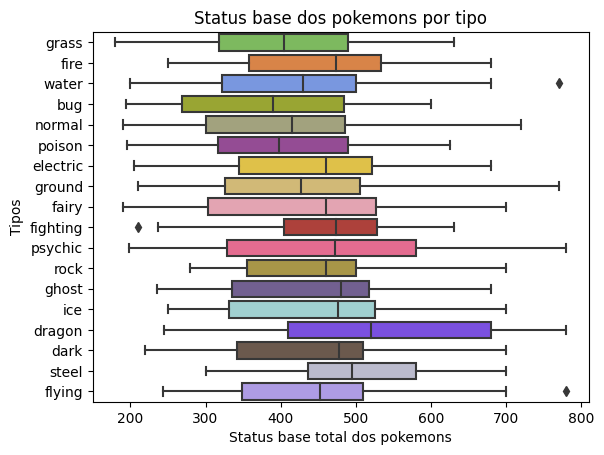

In [ ]:
# plotando o gráfico
sns.boxplot(data=type_double, x='base_stat_total', y='type', palette=type_colors)

plt.title("Status base dos Pokemons por tipo")
plt.xlabel('Status base total dos Pokemons')
plt.ylabel('Tipos')

###*4*-Amostragem

Para a amostragem, utilizaremos o valor total do status base.

In [ ]:
# selecionando os status base
pokemon_base_stats = pokemons[
    ['hp','attack','defense','sp_attack','sp_defense','speed']
]
status_total = pokemon_base_stats.sum(axis=1)

legendary = pokemons['is_legendary']

status_total_leg = pd.concat([status_total,legendary, pokemon_base_stats], axis=1)
status_total_leg.rename(columns={0:'status_total'}, inplace=True)
status_total_leg

,status_total,is_legendary,hp,attack,defense,sp_attack,sp_defense,speed
0,318,0,45,49,49,65,65,45
1,405,0,60,62,63,80,80,60
2,625,0,80,100,123,122,120,80
3,309,0,39,52,43,60,50,65
4,405,0,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...
796,570,1,97,101,103,107,101,61
797,570,1,59,181,131,59,31,109
798,570,1,223,101,53,97,53,43
799,600,1,97,107,101,127,89,79


Fazendo uma amostra aleatória simples, temos:

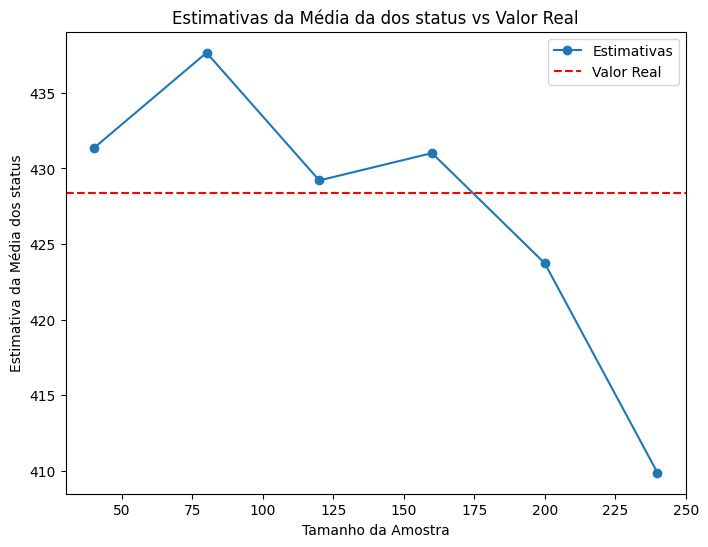

In [ ]:
# definir o tamanho das amostras
tamanhos_amostra = [40, 80, 120, 160, 200, 240]

# calcular a estimativa da média da qualidade para cada tamanho de amostra
estimativas = []
for tamanho in tamanhos_amostra:
    amostra = status_total_leg.sample(n=tamanho)
    estimativa_media = amostra['status_total'].mean()
    estimativas.append(estimativa_media)

# calcular o valor real da média da qualidade
valor_real = status_total_leg['status_total'].mean()

# plotar as estimativas e o valor real
plt.figure(figsize=(8, 6))
plt.plot(tamanhos_amostra, estimativas, marker='o', label='Estimativas')
plt.axhline(y=valor_real, color='red', linestyle='--', label='Valor Real')
plt.xlabel('Tamanho da Amostra')
plt.ylabel('Estimativa da Média dos status')
plt.title('Estimativas da Média da dos status vs Valor Real')
plt.legend()
plt.show()

2- Amostra aleatória sistemática

In [ ]:
# selecionando os status base
pokemon_base_stats = pokemons[
    ['hp','attack','defense','sp_attack','sp_defense','speed']
]
status_total = pokemon_base_stats.sum(axis=1)

legendary = pokemons['is_legendary']

status_total_leg = pd.concat([status_total,legendary, pokemon_base_stats, pokemons['type1']], axis=1)
status_total_leg.rename(columns={0:'status_total'}, inplace=True)
status_total_leg

,status_total,is_legendary,hp,attack,defense,sp_attack,sp_defense,speed,type1
0,318,0,45,49,49,65,65,45,grass
1,405,0,60,62,63,80,80,60,grass
2,625,0,80,100,123,122,120,80,grass
3,309,0,39,52,43,60,50,65,fire
4,405,0,58,64,58,80,65,80,fire
...,...,...,...,...,...,...,...,...,...
796,570,1,97,101,103,107,101,61,steel
797,570,1,59,181,131,59,31,109,grass
798,570,1,223,101,53,97,53,43,dark
799,600,1,97,107,101,127,89,79,psychic


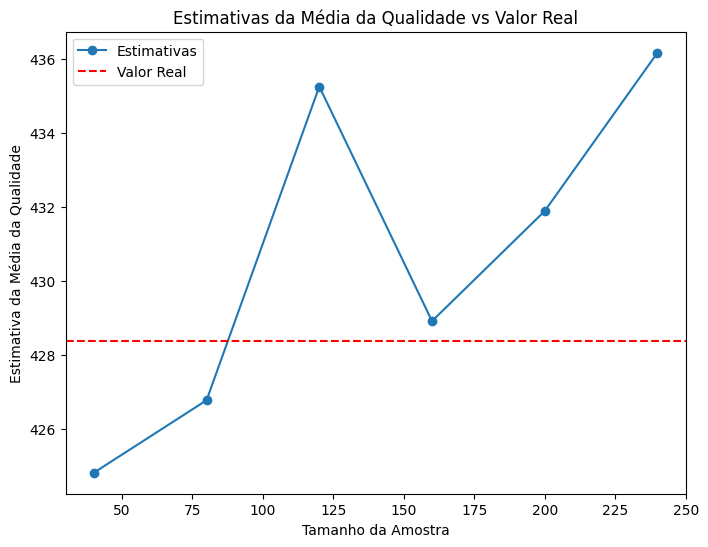

In [ ]:
tamanhos_amostra = [40, 80, 120, 160, 200, 240]
# calcular a estimativa da média da qualidade para cada tamanho de amostra
estimativas = []
for tamanho in tamanhos_amostra:
    # calcular o passo
    passo = len(status_total_leg) // tamanho

    # gerar os índices das amostras sistemáticas
    indices_amostra = np.arange(0, len(status_total_leg), passo)

    # obter as amostras sistemáticas
    amostra = status_total_leg.loc[indices_amostra]

    estimativa_media = amostra['status_total'].mean()
    estimativas.append(estimativa_media)

# calcular o valor real da média da qualidade
valor_real = status_total_leg['status_total'].mean()

# plotar as estimativas e o valor real
plt.figure(figsize=(8, 6))
plt.plot(tamanhos_amostra, estimativas, marker='o', label='Estimativas')
plt.axhline(y=valor_real, color='red', linestyle='--', label='Valor Real')
plt.xlabel('Tamanho da Amostra')
plt.ylabel('Estimativa da Média da Qualidade')
plt.title('Estimativas da Média da Qualidade vs Valor Real')
plt.legend()

###*5*- Modelagem dos dados

1- Regressão Linear

In [ ]:
# selecionando os status base
pokemon_base_stats = pokemons[['hp','attack','defense','sp_attack','sp_defense','speed']]
legendary = pokemons['is_legendary']

status_total_leg = pd.concat([legendary, pokemon_base_stats], axis=1)

status_total_leg

                                 OLS Regression Results                                
Dep. Variable:           is_legendary   R-squared (uncentered):                   0.185
Model:                            OLS   Adj. R-squared (uncentered):              0.179
Method:                 Least Squares   F-statistic:                              30.06
Date:                Mon, 12 Jun 2023   Prob (F-statistic):                    1.42e-32
Time:                        20:26:13   Log-Likelihood:                         -78.526
No. Observations:                 801   AIC:                                      169.1
Df Residuals:                     795   BIC:                                      197.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

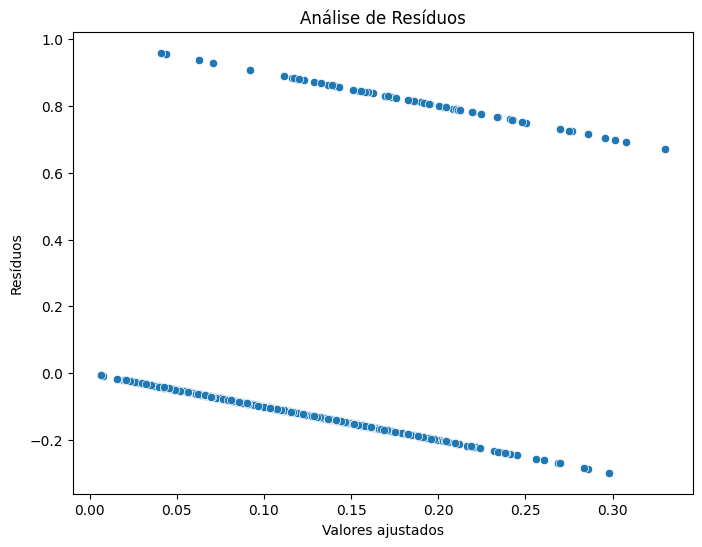

In [ ]:
# adicionar a coluna de interceptação
status_total_leg['intercept'] = 1

# definir as variáveis dependentes e independentes
X = pokemon_base_stats
y = status_total_leg['is_legendary']

# ajustar o modelo de regressão linear usando statsmodels
modelo = sm.OLS(y, X)
resultado = modelo.fit()

# imprimir um resumo dos resultados
print(resultado.summary())

# calcular o R2
r2 = resultado.rsquared
print("R2:", r2)

# análise de resíduos
residuos = resultado.resid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=resultado.fittedvalues, y=residuos)
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()


O relatório de regressão linear apresenta os resultados da análise de regressão realizada com o objetivo de verificar a relação entre os atributos base dos Pokémon (hp, attack, defense, sp_attack, sp_defense e speed) e a variável "is_legendary", que indica se um Pokémon é lendário ou não. Abaixo, estão algumas conclusões importantes que podem ser tiradas a partir do relatório:

1. R-quadrado (R²): O valor do R-quadrado é 0.185, o que indica que aproximadamente 18.5% da variabilidade na variável "is_legendary" pode ser explicada pelas variáveis independentes (atributos base dos Pokémon) incluídas no modelo. Isso sugere que as variáveis independentes têm apenas uma influência moderada na predição de se um Pokémon é lendário ou não.

2. Coeficientes: Os coeficientes estimados para cada atributo base (hp, attack, defense, sp_attack, sp_defense e speed) são próximos de zero. Isso sugere que a maioria desses atributos não possui uma influência significativa na variável "is_legendary". Apenas o atributo "sp_attack" tem um coeficiente significativo (0.0017), o que indica que um aumento no atributo "sp_attack" está associado a um aumento na probabilidade de um Pokémon ser lendário.

3. Intervalo de confiança: Os intervalos de confiança dos coeficientes indicam a incerteza associada às estimativas. Se o intervalo de confiança incluir zero, isso sugere que o coeficiente não é significativamente diferente de zero. No caso deste modelo, a maioria dos intervalos de confiança inclui zero, exceto para o atributo "sp_attack".



Em resumo, o modelo de regressão linear não apresenta um poder explicativo muito forte, com coeficientes insignificantes para a maioria dos atributos base dos Pokémon. No entanto, ele é estatisticamente significativo em geral, e o atributo "sp_attack" parece ser o único atributo relevante para prever se um Pokémon é lendário ou não. A baixa capacidade preditiva do modelo sugere que outros fatores podem influenciar mais fortemente a característica lendária dos Pokémon.

3- Árvores de decisão


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# separando os dados de interesse
X = pokemon_base_stats
y = pokemons['is_legendary']


In [ ]:
# escolhendo o a quantidade de amostras para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# modelando o classificador
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# predizendo e verificando a acurácia a partir da parte do test e do sumário recebido do scikit learn
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia do classificador:', accuracy)
# obtendo um relatório de classificação
classification_summary = classification_report(y_test, y_pred)
print(classification_summary)

Acurácia do classificador: 0.921161825726141
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       216
           1       0.64      0.56      0.60        25

    accuracy                           0.92       241
   macro avg       0.79      0.76      0.78       241
weighted avg       0.92      0.92      0.92       241



A partir do relatório apresentado  usando o modelo de árvores de decisão, podemos tirar algumas conclusões sobre a performance do modelo em relação à classificação das observações:

1. Acurácia: A acurácia do classificador é de aproximadamente 92.12%, o que indica que ele classificou corretamente cerca de 92.12% das observações no conjunto de teste.

2. Precision (Precisão): A precisão é uma medida da proporção de observações positivas previstas corretamente em relação ao total de observações classificadas como positivas. Para a classe 0 (não lendário), a precisão é de aproximadamente 95%, o que significa que o modelo classificou corretamente cerca de 95% dos Pokémon não lendários. Para a classe 1 (lendário), a precisão é de aproximadamente 64%, o que indica que o modelo classificou corretamente cerca de 64% dos Pokémon lendários.

3. Recall (Sensibilidade): O recall é uma medida da proporção de observações positivas previstas corretamente em relação ao total de observações positivas reais. Para a classe 0 (não lendário), o recall é de aproximadamente 96%, o que indica que o modelo identificou corretamente cerca de 96% dos Pokémon não lendários presentes no conjunto de teste. Para a classe 1 (lendário), o recall é de aproximadamente 56%, o que significa que o modelo identificou corretamente cerca de 56% dos Pokémon lendários no conjunto de teste.

Conclusão: O modelo de árvores de decisão possui uma boa acurácia geral (92.12%), mas apresenta uma melhor performance na classificação de Pokémon não lendários (classe 0) do que na classificação de Pokémon lendários (classe 1). Isso pode ser explicado pelo desbalanceamento do conjunto de dados, pois há muito mais Pokémon não lendários do que lendários. Portanto, é importante considerar outras métricas além da acurácia para avaliar a performance do modelo, especialmente quando os dados são desbalanceados.

###6-Conclusão

Dessa forma, podemos obter conclusões valiosas sobre os dados apresentados a partir das análises propostas na introdução deste estudo. Disso, temos:

* O tipo de Pokemon mais comum é, com base na análise do conjunto de dados, 'water'. Assim, Pokemons aquáticos são os mais frequentes, seguidos dos normais. Quanto ao tipo de Pokemon mais raro, temos o 'ice', que não apresentou contagem alta na sua recorrência.
* Quanto à possibilidade de elaborar um classificador para determinar se um Pokémon é lendário ou não, confirmamos que é viável. Os modelos de predição utilizados demonstraram resultados que destacam a relação entre as características dos Pokémon e sua classificação como lendários.
* Ao analisar a relação entre o tipo de Pokémon e seus status base, constatamos que os Pokémon do tipo "dragão" tendem a possuir maiores status base, enquanto os do tipo "fighting" possuem os menores. Entretanto, a relação entre tipo e status não se mostrou tão clara, indicando que outros fatores também influenciam nos status dos Pokémon.
* Por nossas análises, conseguimos visualizar que a altura do Pokemon não está fortemente relacionada à sua velocidade. A altura se mostrou mais influente nos valores para 'peso' do que para outros atributos.
* Também conseguimos ver que o tipo psíquico de Pokemon é o mais recorrente dentre os Pokemons lendários, com boa vantagem acima dos demais. Em segundo lugar, temos Pokemons com o tipo dragão.
* Percebemos também que as somas totais de stats tendem a se concentrar em 500 pontos. Contudo, a incidência de Pokémons com maiores stats é quase reservada para Pokémons lendários.
* Ficaram evidenciadas determinadas características de Pokémons lendários: Atributos especiais e agilidade. Pokemóns lendários tendem a apresentar maiores velocidades (speed), defesa especial (sp_def) e, principalmente, ataque especial (sp_atk).
* Apesar do tipo psíquico ter mais Pokemóns lendários, os stats base do tipo variam entre 350 e 575. Temos, portanto, um valor de alta variação, porém ainda dentro das médias gerais de stats base. Note que o 2º tipo com maior incidência de Pokemóns lendários (dragões) possuem maior stats base, variando aproximadamente entre 425 e 675.
* Pontuamos que o tipo 'voador' possue a menor incidência de Pokémons considerados para muitas dessas análises, uma vez que apresenta cerca de 95 Pokemons, com apenas um deles sendo lendário.
* Observamos que o tipo que possui menor stats base é o tipo 'inseto', uma vez que seus valores variam entre 300 (menor valor mínimo analisado) e 500 (menor valor máximo analisado).
* Em suma, as análise propostas e realizadas fornecem uma base sólida para futuras pesquisas e estudos sobre os Pokémons. Com mais dados e técnicas avançadas de análise, seria possível aprofundar ainda mais o estudo de relações entre pokémons.